# Display in Jupyter

## Plotting in Jupyter

#### This magic configures matplotlib to render its figure inline

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

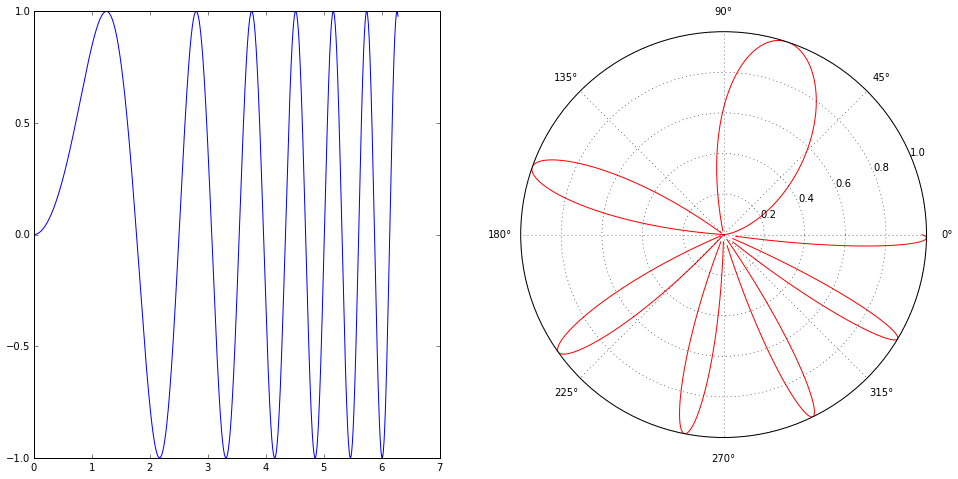

In [3]:
plt.figure(figsize=(16, 8))

ax0 = plt.subplot2grid((1, 2), (0, 0))
ax1 = plt.subplot2grid((1, 2), (0, 1), polar=True)

x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x**2)
ax0.plot(x, y)
plt.polar(x, y, color="r")

plt.show()

## LaTeX equations

Courtesy of MathJax, you can include mathematical expressions both inline: 
$e^{i\pi} + 1 = 0$  and displayed:

$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$

## General HTML

Because Markdown is a superset of HTML you can even add things like HTML tables:

<table>
  <tr>
    <th>Header 1</th>
    <th>Header 2</th>
  </tr>
  <tr>
    <td>row 1, cell 1</td>
    <td>row 1, cell 2</td>
  </tr>
  <tr>
    <td>row 2, cell 1</td>
    <td>row 2, cell 2</td>
  </tr>
</table>

## Local files

If you have local files in your Notebook directory, you can refer to these files in Markdown cells via relative URLs.  
For example, in the `figs` subdirectory there is a Python logo:  

<img src="figs/python-logo.svg" />

and a video with the HTML5 video tag (WAT: A lightning talk by Gary Bernhardt from CodeMash 2012):  
  
<video controls src="figs/wat.mov" />

## Basic display imports

The `display` function is tool for displaying images, videos, web pages, etc.

#### Images (JPEG, PNG):

In [4]:
from IPython.display import Image

In [5]:
logo = Image(filename='figs/python-logo.png')

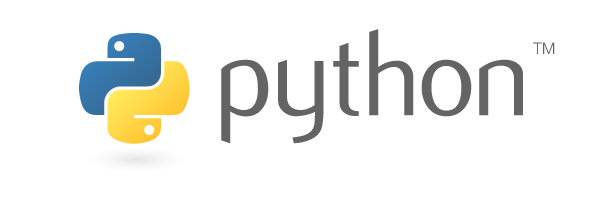

In [6]:
logo

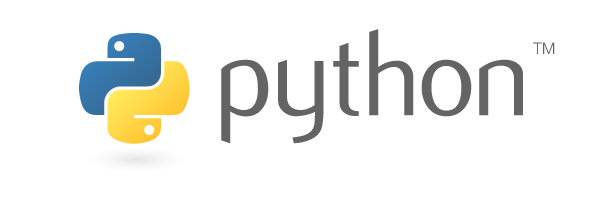

In [7]:
Image(url='https://www.python.org/static/community_logos/python-logo-master-v3-TM-flattened.png', 
      embed=True)

#### Videos

In [8]:
from IPython.display import YouTubeVideo
#https://www.youtube.com/watch?v=iapcKVn7DdY
YouTubeVideo('iapcKVn7DdY')

#### Web pages

You can even embed an entire page from another site in an iframe; for example this is the Ipython webpage:

In [9]:
from IPython.display import IFrame
IFrame('http://ipython.org/notebook.html', 800, 400)

## Interactive Widgets

IPython includes an architecture for interactive widgets that tie together Python code running in the kernel and JavaScript/HTML/CSS running in the browser. These widgets enable users to explore their code and data interactively.  
  
**How does this work?**  

* The first argument to interact is a callable/function
* The keyword arguments to `interact` are "widget abbreviations"
* These "widget abbreviations" are converted to `Widget` instances
* These `Widgets` objects are Python objects that are automatically synchronized with JavaScript MVC objects running in the browser.
* `interact` simply calls its callable each time any widget changes state

In [10]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [11]:
def f(x):
    print(x)

In [12]:
res = interact(f, x=True)

True


In [13]:
res = interact(lambda x: print(x**2), 
               x=10)

100


In [14]:
res = interact(lambda x: print(x**2), 
               x=(0, 10, 2))

16


In [15]:
res = interact(f, x='Hello World!')

Hello World!


In [16]:
res = interact(f, x=dict(apple='fruit', orange='color', guitar='instrument'))

instrument


In [17]:
@interact(x=True, y=1.0)
def f(x, y):
    print(x, y**2 if x else y)

True 1.0


In [18]:
def f(x, y):
    print(x + y)

In [19]:
res = interact(f, x=5, y=fixed(20))

25


#### Modeling a [Zombie Apocalypse](http://wiki.scipy.org/Cookbook/Zombie_Apocalypse_ODEINT)

The model has the following constants:  
- Natural death (per day): 0.0001%  
- Transmission (per day): 0.0095%
- Resurect: 0.0001%  
- Destroy: 0.0001%

We will change the following variables:  
- initial human population
- initial zombie population  
- initial death population  
- daily new births

In [20]:
# Zombie apocalypse modeling
from scipy.integrate import odeint

d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A = 0.0001  # destroy percent  (per day)
t  = np.linspace(0, 5., 1000)   # time grid


# Solve the system dy/dt = f(y, t)
def f(y, t):
    Si = y[0]
    Zi = y[1]
    Ri = y[2]
    P = y[3]
    # The model equations (see Munz et al. 2009)
    f0 = P - B*Si*Zi - d*Si
    f1 = B*Si*Zi + G*Ri - A*Si*Zi
    f2 = d*Si + A*Si*Zi - G*Ri
    return [f0, f1, f2]


def zombie_apocalypse(initial_human_population, 
                      initial_zombie_population, 
                      initial_death_population, 
                      daily_new_births):
    # initial condition vector
    y0 = [initial_human_population, initial_zombie_population, initial_death_population, daily_new_births]       
    soln = odeint(f, y0, t)
    S = soln[:, 0]
    Z = soln[:, 1]
    R = soln[:, 2]
    
    # Plot the apocalypse
    plt.figure()
    plt.plot(t, S, label='Living')
    plt.plot(t, Z, label='Zombies')
    plt.xlabel('Days from outbreak')
    plt.ylabel('Population')
    plt.title('Zombie Apocalypse')
    plt.legend(loc=0)

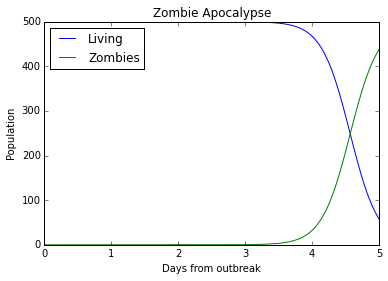

In [21]:
res = interact(zombie_apocalypse, 
               initial_human_population=widgets.IntSlider(min=500, max=1000, step=50, value=500),
               initial_zombie_population=fixed(0),
               initial_death_population=widgets.IntSlider(min=0, max=100, step=10, value=0),
               daily_new_births=widgets.IntSlider(min=0, max=10, step=1, value=0)
              )

## Other ploting libraries

### Matplotlib

In [22]:
x = np.random.normal(2, 2, 10000)
y = np.random.normal(10, 5, 10000)

In [23]:
def do_histogram(x):
    n, bins, patches = plt.hist(x, normed=1)
    plt.show()

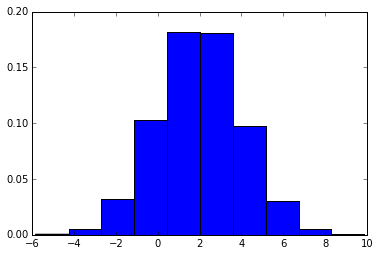

In [24]:
do_histogram(x)

### Seaborn

In [25]:
import seaborn as sns

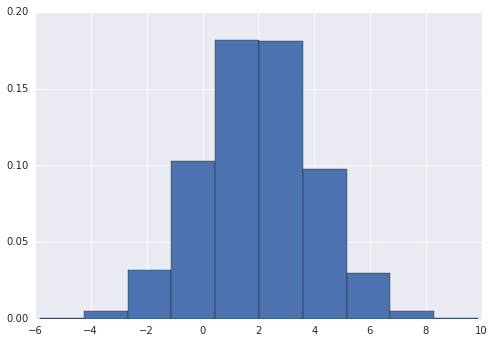

In [26]:
do_histogram(x)

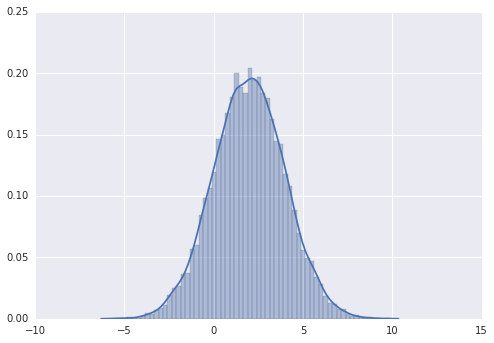

In [27]:
p = sns.distplot(x, hist=True, rug=False)

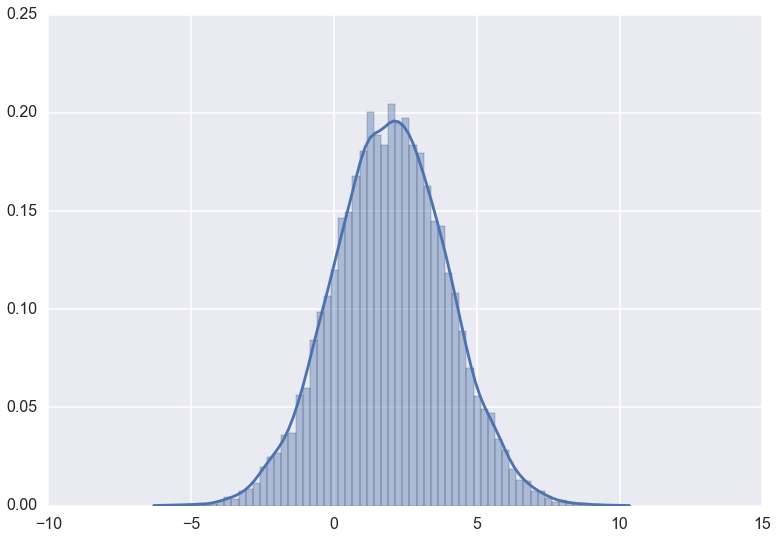

In [28]:
sns.set_context('poster')
p = sns.distplot(x, hist=True, rug=False)

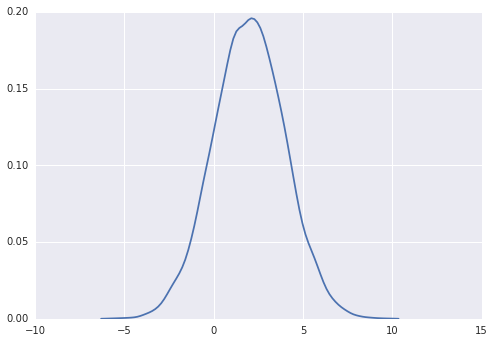

In [29]:
sns.set_context('notebook')
p = sns.kdeplot(x)

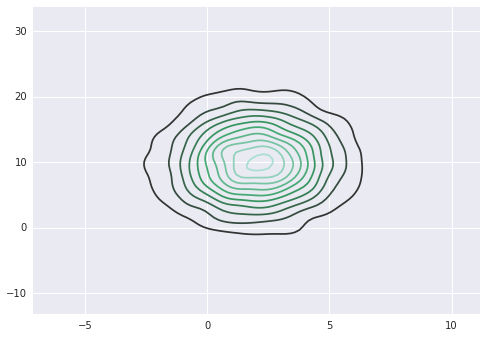

In [30]:
p = sns.kdeplot(x, y)

### Bokeh


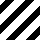
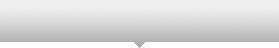
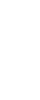
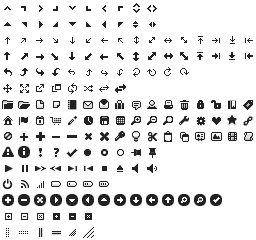
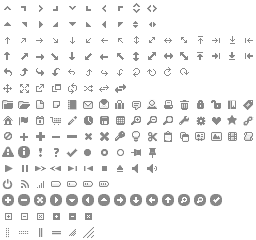
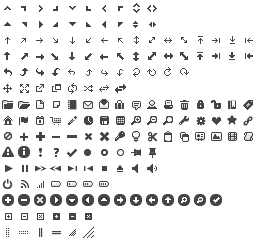
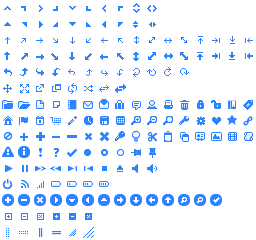
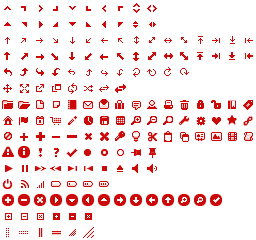
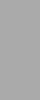
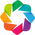
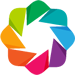
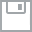
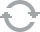
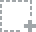
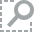
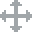
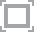
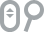

In [31]:
from bokeh import mpl
from bokeh.plotting import output_notebook, show

# Just plot seaborn kde
sns.kdeplot(x)

show(mpl.to_bokeh(notebook=True))

### XCDS plots

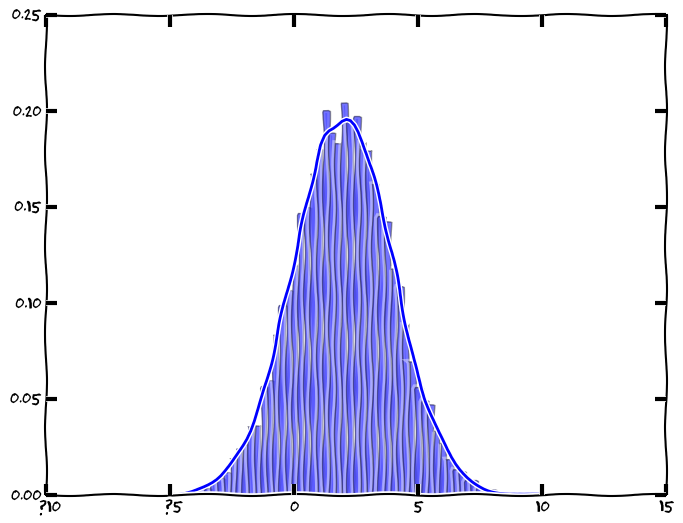

In [32]:
sns.set_context('poster')
sns.reset_orig()
with plt.xkcd():
    p = sns.distplot(x, hist=True, rug=False)